# MedSAM 3-channel version: DWI, ADC and b0

In [1]:
#channels = "1C=DWI"
channels = "3C=DWI_ADC_b0"
#channels = "3C=DWI_ADC_DifDif"

In [2]:
# Loads all methods and data for testing on JAS
from methods_for_testing_MedSAM import *

/home/rosengaard/miniforge3/envs/medsam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/rosengaard/miniforge3/envs/medsam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Subject: 1
Slice 1 of 10
Dice for slice: 0.0


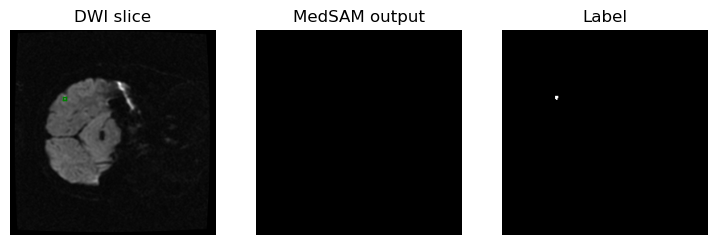

Slice 2 of 10
Dice for slice: 0.304


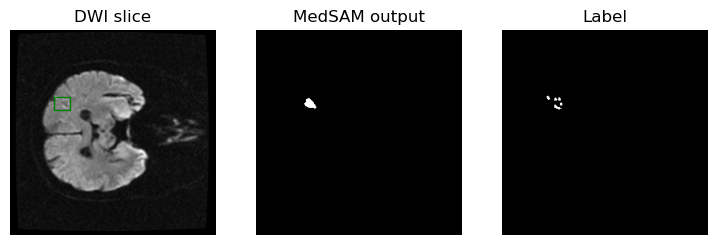

Slice 3 of 10
Dice for slice: 0.648


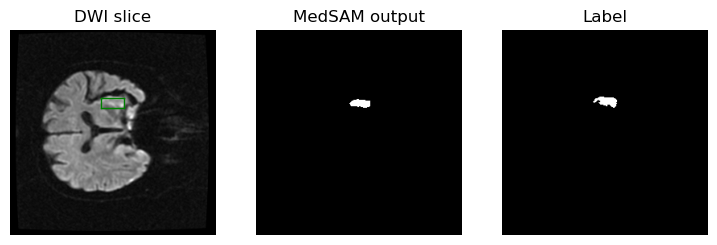

Slice 4 of 10
Dice for slice: 0.678


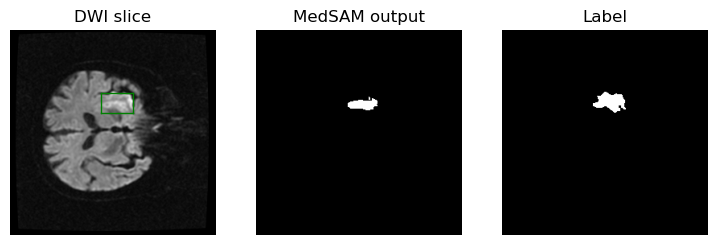

Slice 5 of 10
Dice for slice: 0.489


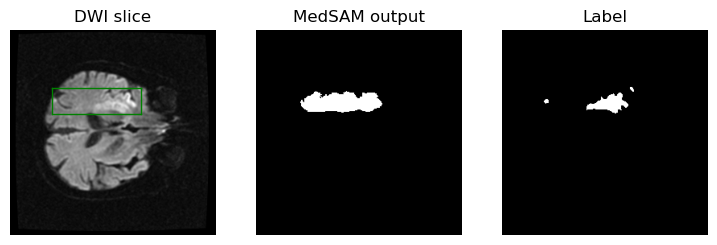

Slice 6 of 10
Dice for slice: 0.596


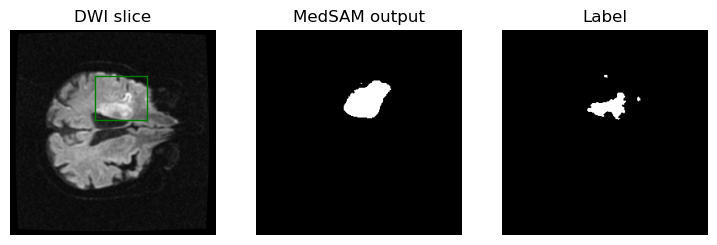

Slice 7 of 10
Dice for slice: 0.493


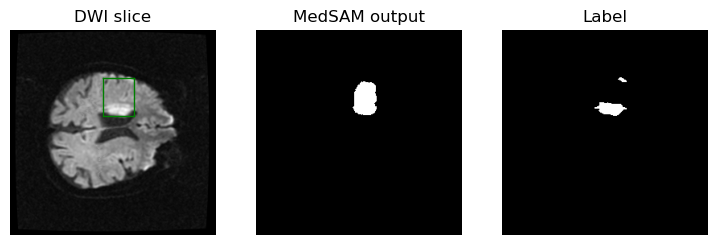

Slice 8 of 10
Dice for slice: 0.107


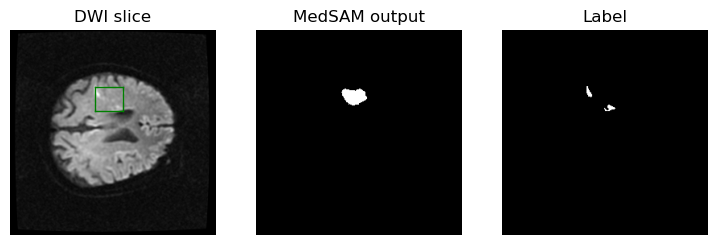

Slice 9 of 10
Dice for slice: 0.057


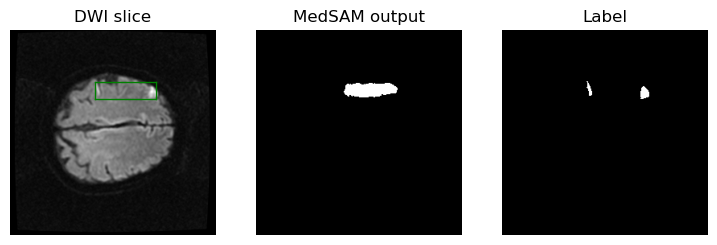

Slice 10 of 10
Dice for slice: 0.246


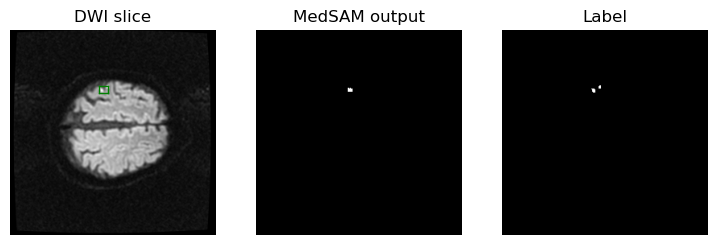

Mean dice for subject: 0.362
_____________________________
Subject: 2
Slice 1 of 1
Dice for slice: 0.876


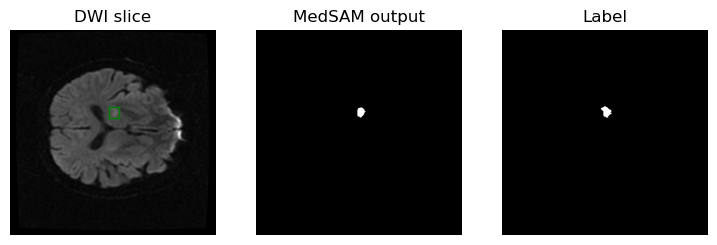

Mean dice for subject: 0.876
_____________________________
Subject: 3
Slice 1 of 10
Dice for slice: 0.676


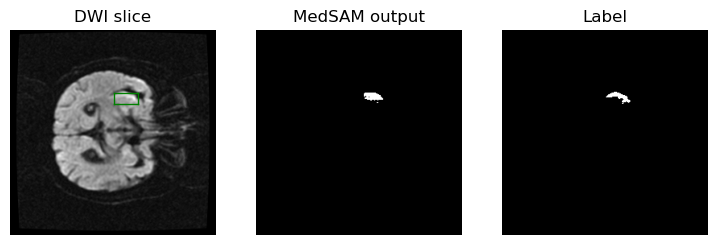

Slice 2 of 10
Dice for slice: 0.553


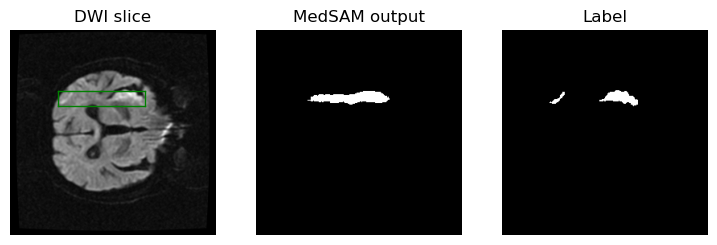

Slice 3 of 10
Dice for slice: 0.632


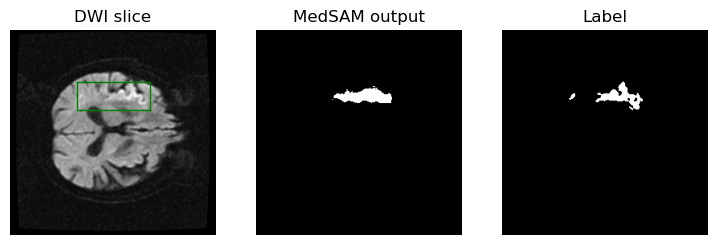

Slice 4 of 10
Dice for slice: 0.798


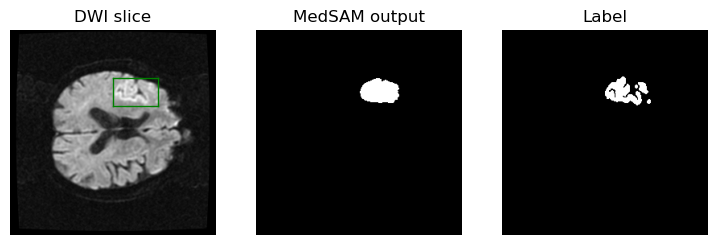

Slice 5 of 10
Dice for slice: 0.623


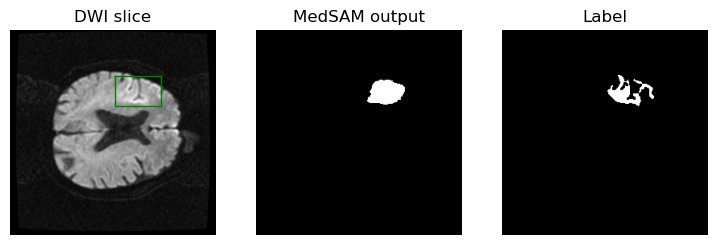

Slice 6 of 10
Dice for slice: 0.541


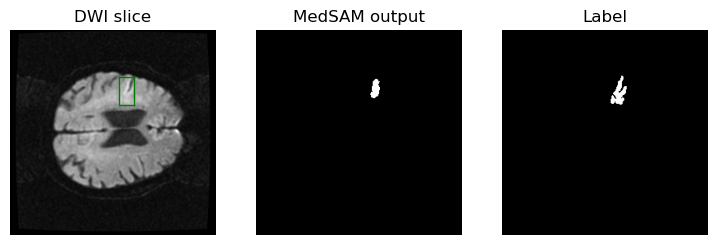

Slice 7 of 10
Dice for slice: 0.338


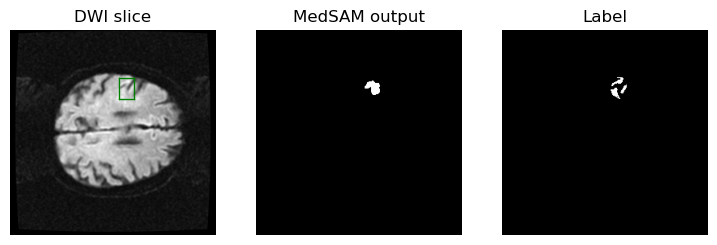

Slice 8 of 10
Dice for slice: 0.659


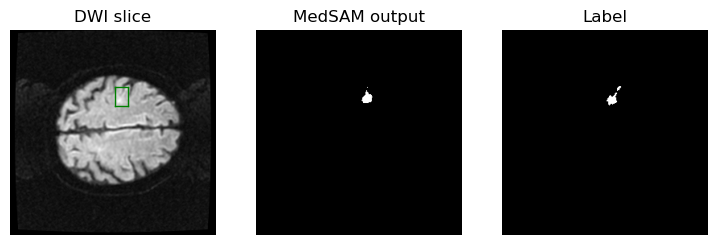

Slice 9 of 10
Dice for slice: 0.397


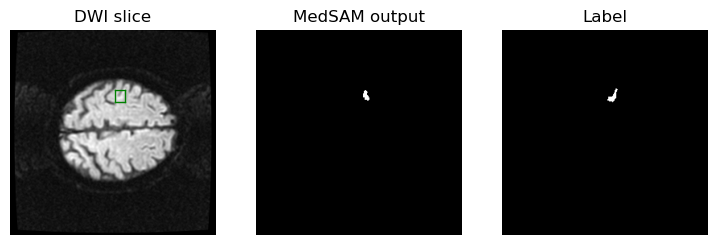

Slice 10 of 10
Dice for slice: 0.37


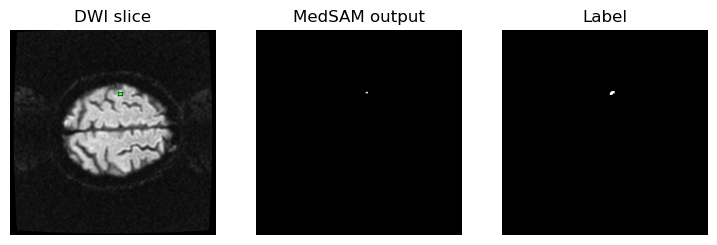

Mean dice for subject: 0.559
_____________________________
Subject: 4
Slice 1 of 10
Dice for slice: 0.733


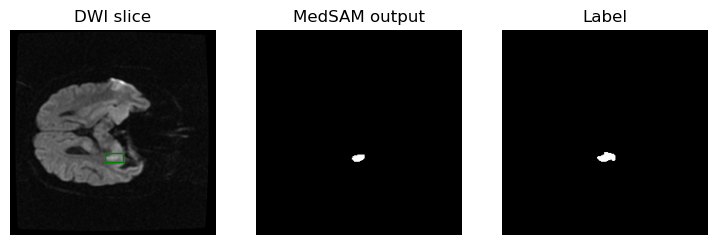

Slice 2 of 10
Dice for slice: 0.707


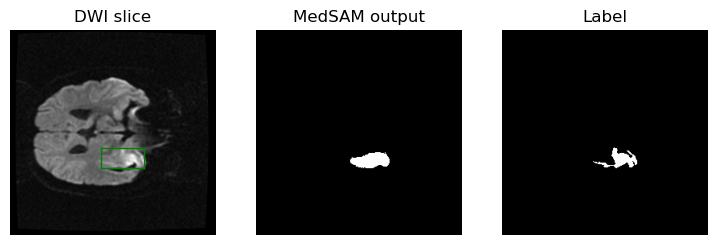

Slice 3 of 10
Dice for slice: 0.713


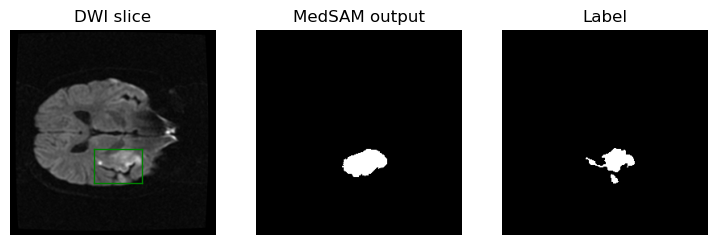

Slice 4 of 10
Dice for slice: 0.865


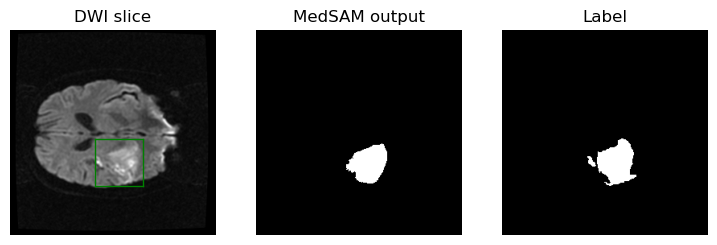

Slice 5 of 10
Dice for slice: 0.847


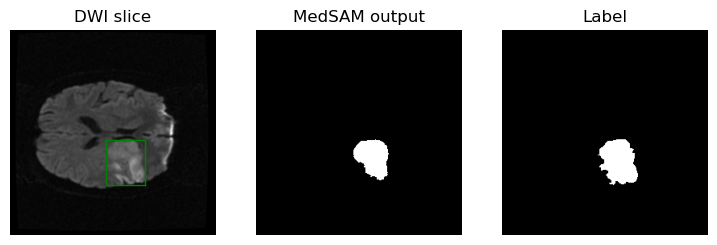

Slice 6 of 10
Dice for slice: 0.83


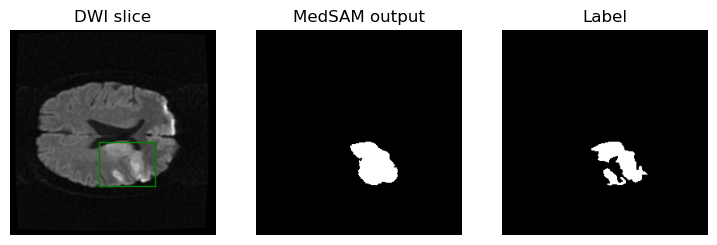

Slice 7 of 10
Dice for slice: 0.688


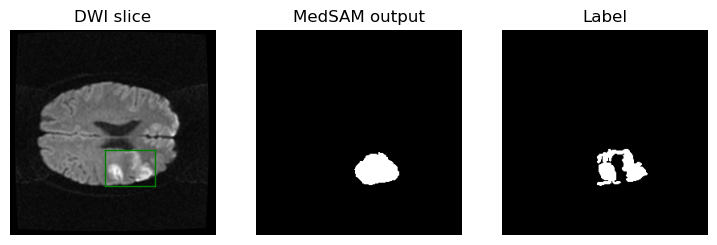

Slice 8 of 10
Dice for slice: 0.38


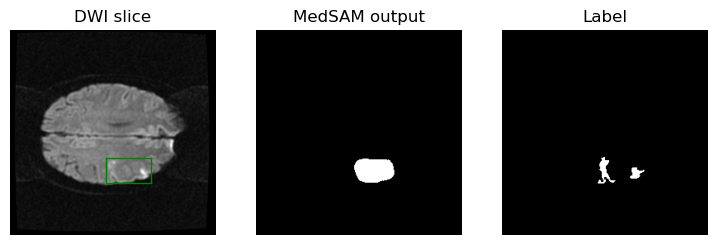

Slice 9 of 10
Dice for slice: 0.654


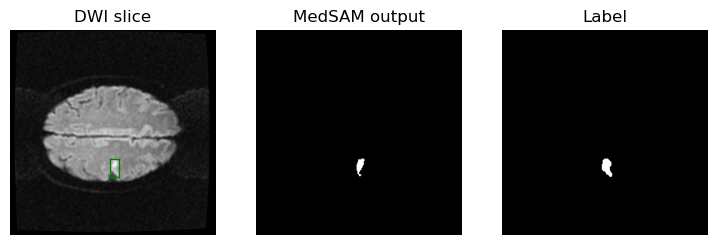

Slice 10 of 10
Dice for slice: 0.854


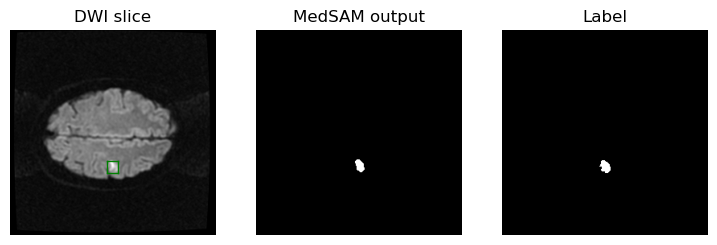

Mean dice for subject: 0.727
_____________________________
Subject: 5
Slice 1 of 4
Dice for slice: 0.803


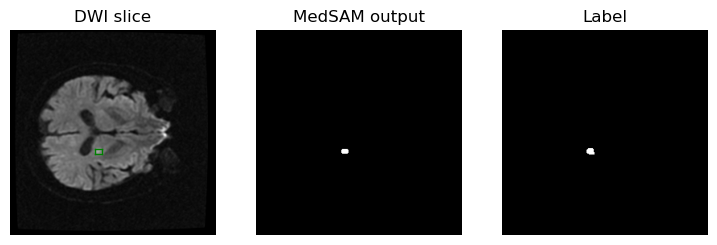

Slice 2 of 4
Dice for slice: 0.545


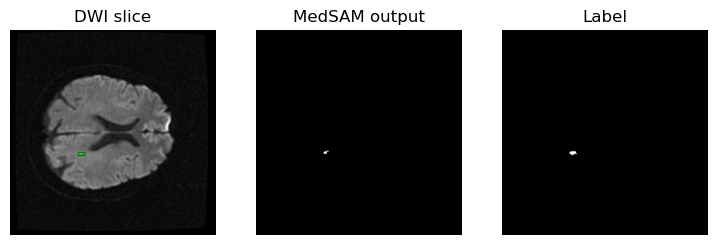

Slice 3 of 4
Dice for slice: 0.667


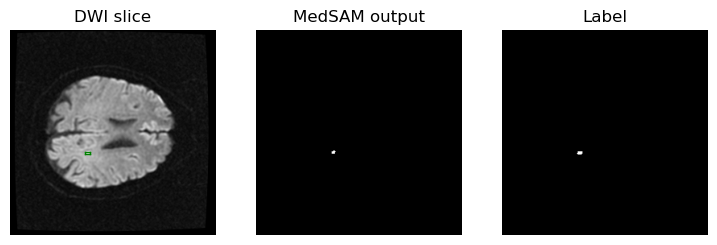

Slice 4 of 4
Dice for slice: 0.5


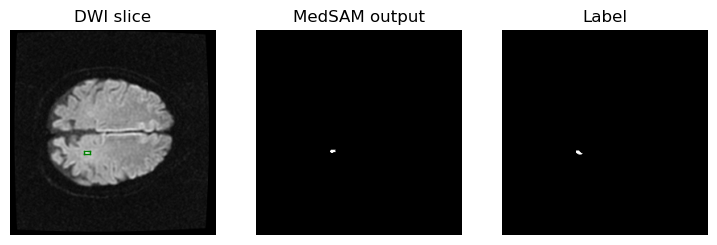

Mean dice for subject: 0.629
_____________________________
Subject: 6
Slice 1 of 7
Dice for slice: 0.531


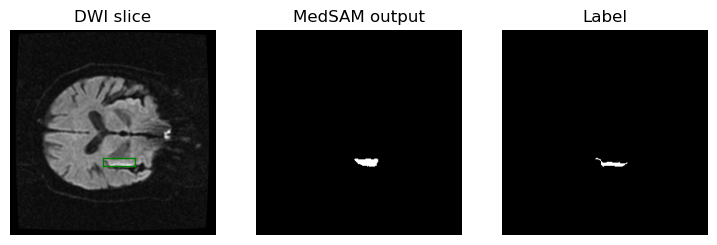

Slice 2 of 7
Dice for slice: 0.703


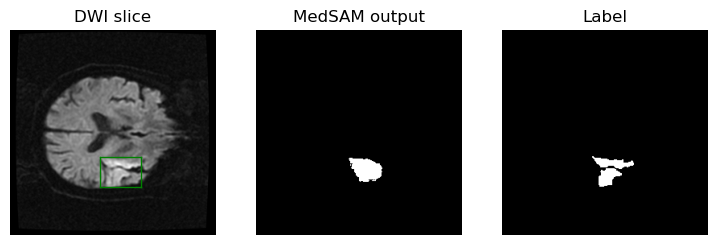

Slice 3 of 7
Dice for slice: 0.748


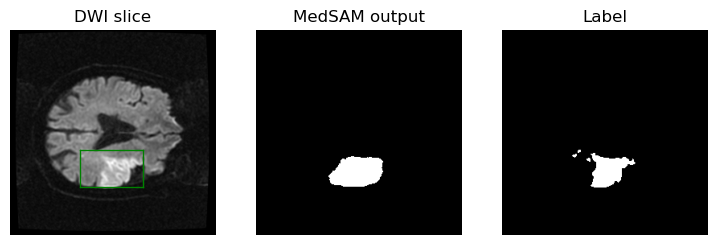

Slice 4 of 7
Dice for slice: 0.86


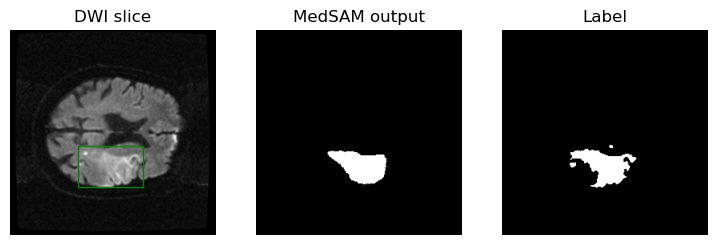

Slice 5 of 7
Dice for slice: 0.715


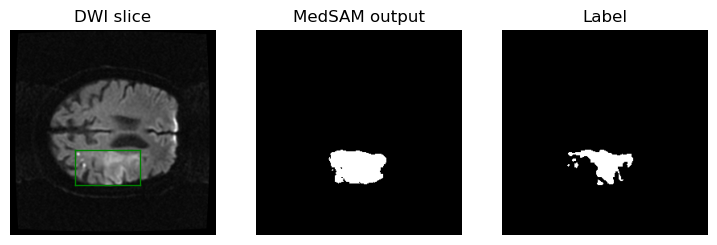

Slice 6 of 7
Dice for slice: 0.258


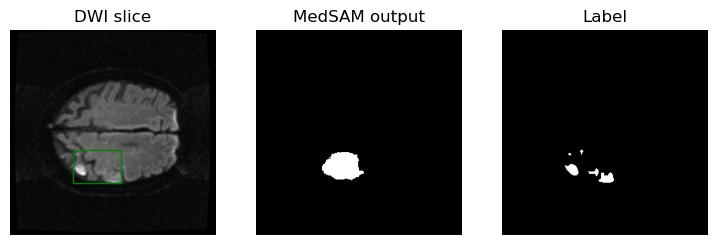

Slice 7 of 7
Dice for slice: 0.075


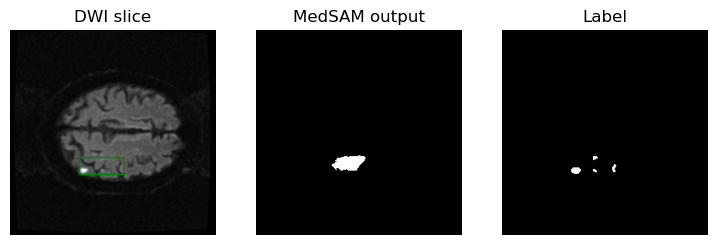

Mean dice for subject: 0.556
_____________________________
Subject: 7
Slice 1 of 6
Dice for slice: 0.868


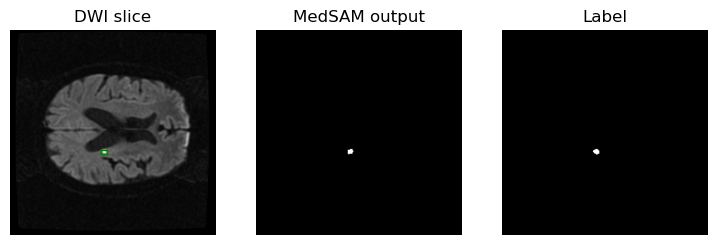

Slice 2 of 6
Dice for slice: 0.667


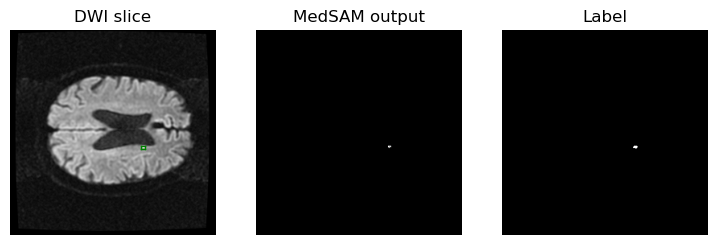

Slice 3 of 6
Dice for slice: 0.778


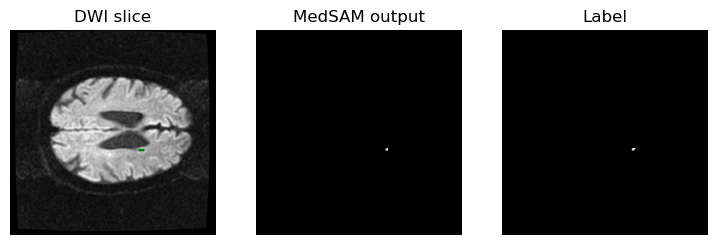

Slice 4 of 6
Dice for slice: 0.719


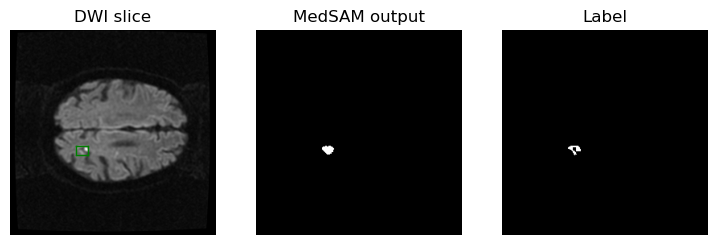

Slice 5 of 6
Dice for slice: 0.053


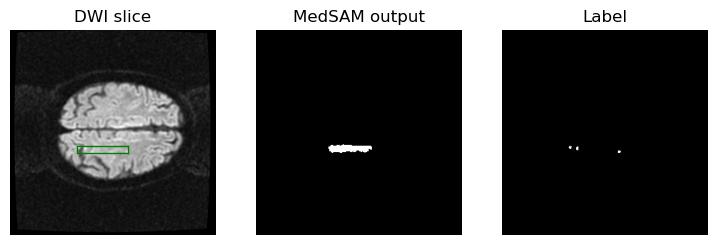

Slice 6 of 6
Dice for slice: 0.28


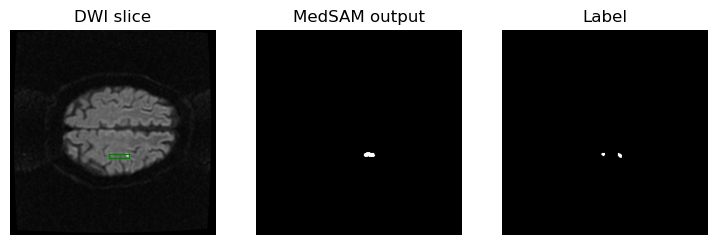

Mean dice for subject: 0.561
_____________________________
Subject: 8
Slice 1 of 10
Dice for slice: 0.5


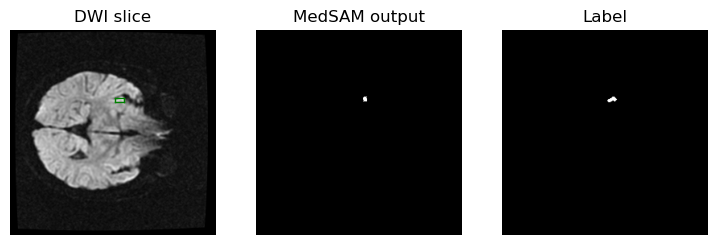

Slice 2 of 10
Dice for slice: 0.797


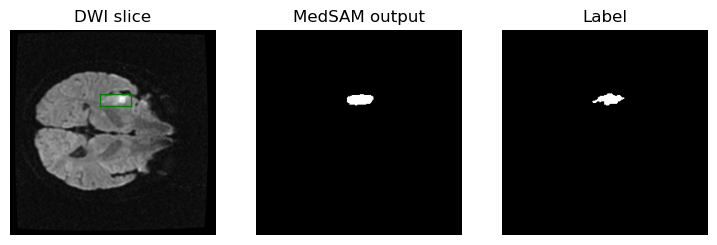

Slice 3 of 10
Dice for slice: 0.838


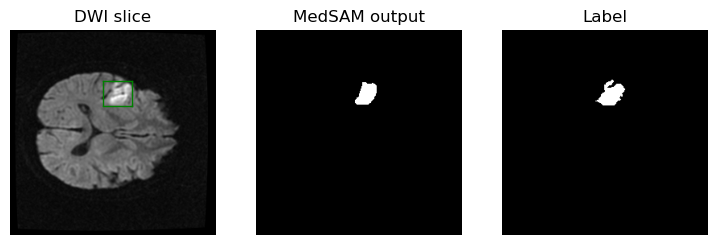

Slice 4 of 10
Dice for slice: 0.883


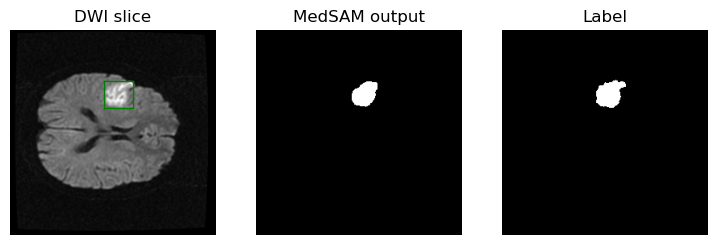

Slice 5 of 10
Dice for slice: 0.818


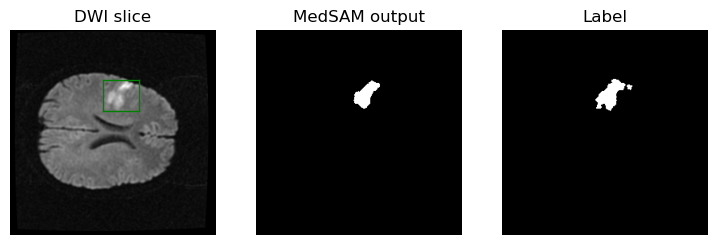

Slice 6 of 10
Dice for slice: 0.556


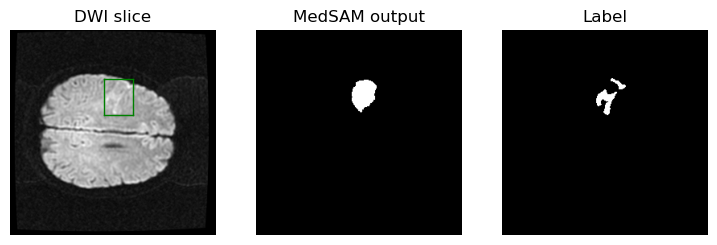

Slice 7 of 10
Dice for slice: 0.5


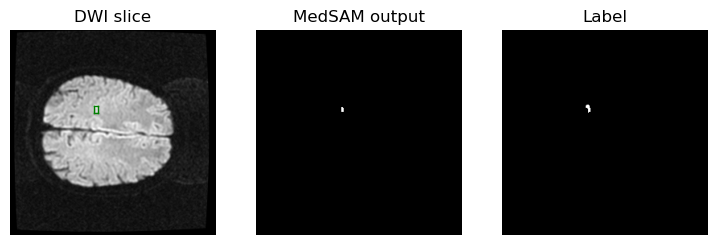

Slice 8 of 10
Dice for slice: 0.407


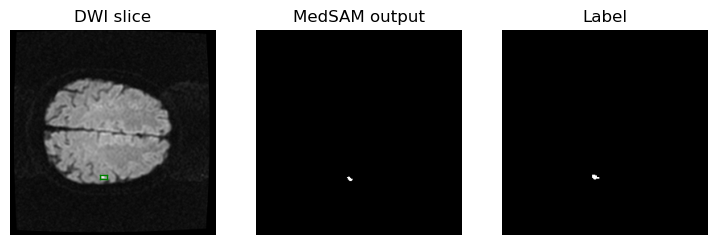

Slice 9 of 10
Dice for slice: 0.0


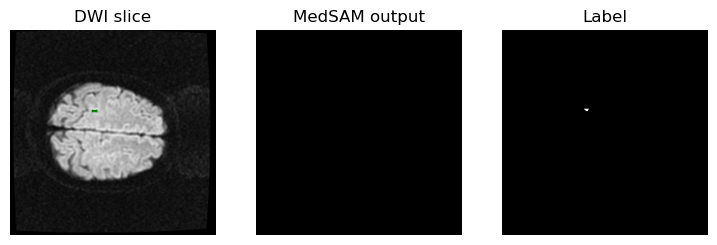

Slice 10 of 10
Dice for slice: 0.591


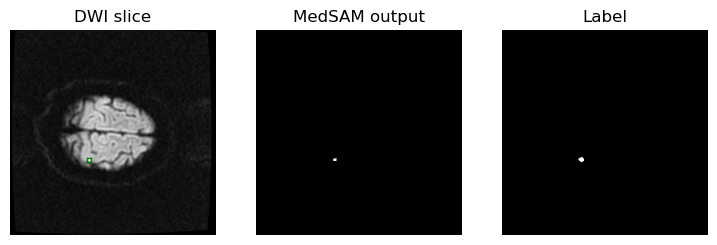

Mean dice for subject: 0.589
_____________________________
__________________________________________________________________
Mean dice for each subject: [0.3616371172135101, 0.8756218905472637, 0.5587840094503158, 0.7271840243653163, 0.6288850038850039, 0.5556364985389969, 0.560964080807526, 0.5890536756660277]

Mean dice for all subjects: 0.607220787559245


In [3]:
#Test loop
model = MSSD(medsam_model)
Avg_Dice_subjects = []
Dice_for_subjects = []
for idx in range(0,len(data)):
    dice_score_vol = []
    print('Subject:',idx+1)

    #Load data:
    DWI_path, ADC_path, b0_path, label_path = data[idx]
    input_vol = get_volume(DWI_path, ADC_path, b0_path, channels)

    # Get the bounding_box to prompt SAM:
    label_vol = nib.load(label_path).get_fdata()
    prompt = get_bounding_box(label_vol, False)

    ii = 0
    for i in range(len(input_vol[0,0,0,:])):
        label_slice = label_vol[:,:,i]
        if np.sum(label_slice) > 0:
            print('Slice',ii+1,'of',len(prompt))
            slice = input_vol[:,:,:,i]
            model_output = model.get_segmentationsMask(slice, prompt[ii])
            model_output = model_output[0]
            model_output = model_output[:,:,0]
            bbox = prompt[ii]
            ii += 1

            #Dice:
            dice_score_slice = Find_DICE_slice(model_output, label_slice)
            dice_score_vol.append(dice_score_slice)
            print('Dice for slice:', round(dice_score_slice,3))

            #Plot:
            plotFunc(slice[:,:,0], model_output, label_slice, bbox)
    
    Dice_for_subjects.append(dice_score_vol)
    Avg_Dice_subjects.append(mean(dice_score_vol))
    print('Mean dice for subject:', round(mean(dice_score_vol),3))
    print('_____________________________')
print('__________________________________________________________________')
print('Mean dice for each subject:', Avg_Dice_subjects)
print('')
print('Mean dice for all subjects:', mean(Avg_Dice_subjects))

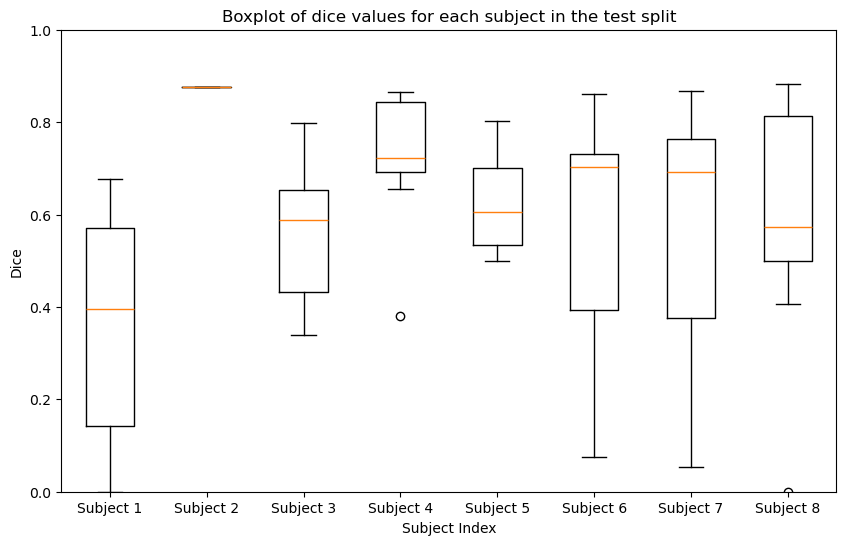

In [5]:
# Example data: a list of lists
data = Dice_for_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()